### 1. Importing Libraries and Data

In [1]:
import numpy as np

In [2]:
import pandas as pd
import string
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('email.csv')

In [4]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 2. Data Analysis

In [5]:
data['Category']

0                  ham
1                  ham
2                 spam
3                  ham
4                  ham
             ...      
5568               ham
5569               ham
5570               ham
5571               ham
5572    {"mode":"full"
Name: Category, Length: 5573, dtype: object

In [6]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Category'])


In [7]:
one_hot_encoded_data

,Message,Category_ham,Category_spam,"Category_{""mode"":""full"""
0,"Go until jurong point, crazy.. Available only ...",1,0,0
1,Ok lar... Joking wif u oni...,1,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0,1,0
3,U dun say so early hor... U c already then say...,1,0,0
4,"Nah I don't think he goes to usf, he lives aro...",1,0,0
...,...,...,...,...
5568,Will ü b going to esplanade fr home?,1,0,0
5569,"Pity, * was in mood for that. So...any other s...",1,0,0
5570,The guy did some bitching but I acted like i'd...,1,0,0
5571,Rofl. Its true to its name,1,0,0


In [8]:
df_encoded =one_hot_encoded_data.drop(['Category_ham','Category_spam','Category_{"mode":"full"'], axis=1)

In [9]:
df_encoded['Category']= one_hot_encoded_data['Category_spam']

In [10]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Message   5573 non-null   object
 1   Category  5573 non-null   uint8 
dtypes: object(1), uint8(1)
memory usage: 49.1+ KB


In [11]:
df_encoded.duplicated().sum()

415

In [12]:
df = df_encoded.drop_duplicates(keep='first')

In [13]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x28f56b30a00>,
 [Text(-1.0172262591856387, 0.4186295947770443, 'ham'),
  Text(1.017226219990703, -0.4186296900166379, 'spam')],
 [Text(-0.5548506868285301, 0.22834341533293323, '87.573'),
  Text(0.5548506654494743, -0.22834346728180246, '12.427')])

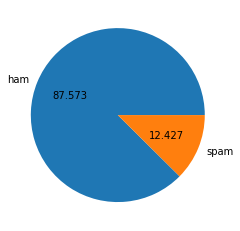

In [14]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.3f')

In [15]:
#data is imbalanced

In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mitta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters']= df['Message'].apply(len)

In [19]:
df.head()

,Message,Category,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [20]:
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [21]:
df.head()

,Message,Category,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [22]:
df['Message'].apply(lambda x:nltk.sent_tokenize(x))[0]


['Go until jurong point, crazy..',
 'Available only in bugis n great world la e buffet... Cine there got amore wat...']

In [23]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [24]:
df.head()

,Message,Category,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [25]:
df.describe()

,Category,num_characters,num_words,num_sentences
count,5158.000000,5158.000000,5158.000000,5158.000000
mean,0.124273,79.091508,18.555060,1.950368
std,0.329925,58.384085,13.406257,1.362913
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [26]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

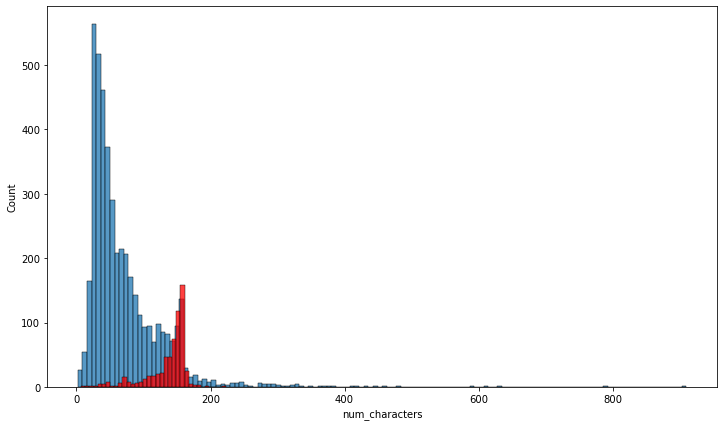

In [27]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['Category']==0]['num_characters'])
sns.histplot(df[df['Category']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

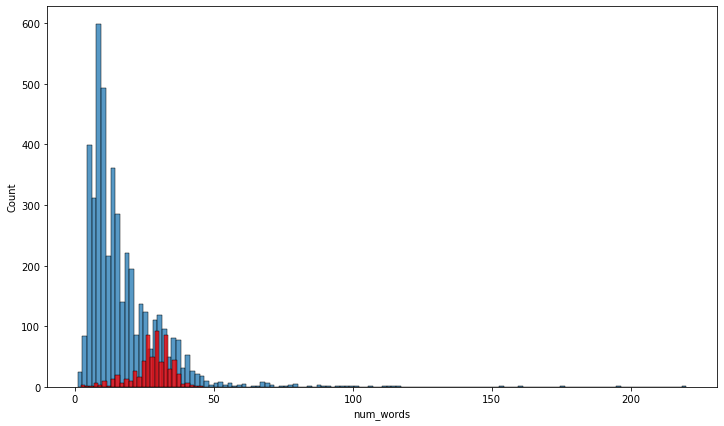

In [28]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['Category']==0]['num_words'])
sns.histplot(df[df['Category']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

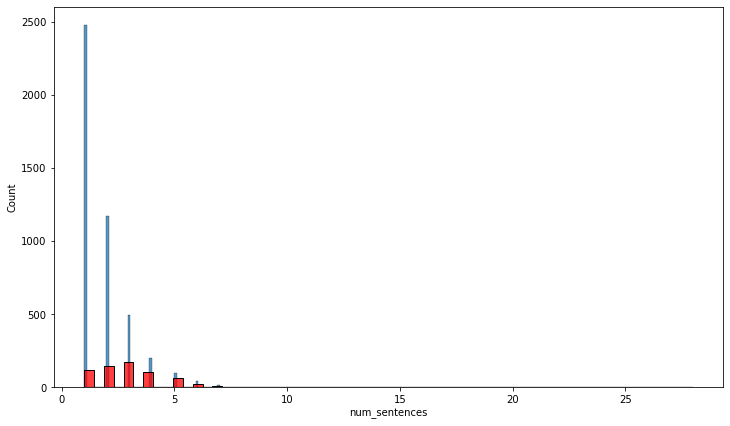

In [29]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['Category']==0]['num_sentences'])
sns.histplot(df[df['Category']==1]['num_sentences'],color='red')

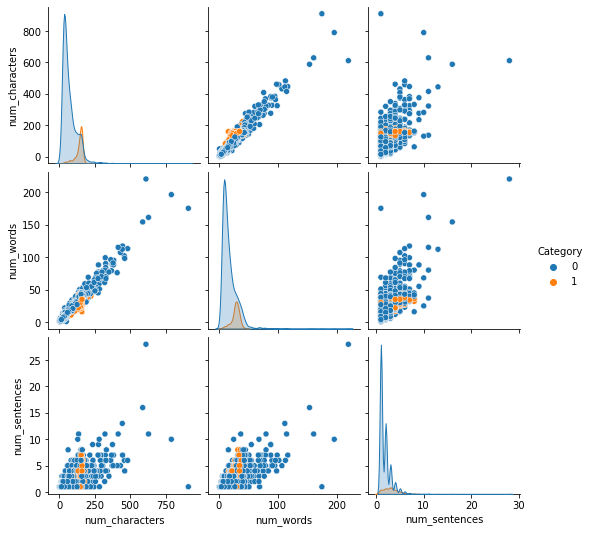

In [30]:
sns.pairplot(df,hue='Category')

<AxesSubplot:>

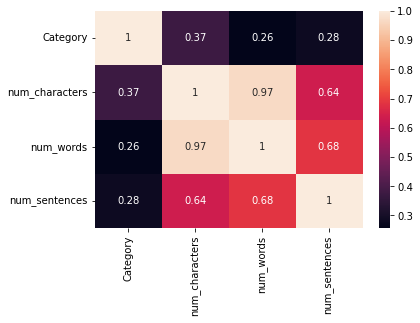

In [31]:
sns.heatmap(df.corr(),annot=True)

### 3. Data Preprocessing

In [32]:
## Data preprocessing
#Lower Case
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#stemmimg

In [33]:
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    q = y[:]   
    #https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    q_decontracted = []
    
   
 
    
    

    for word in q:
        

        #print(is word in contractions)
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    
    
    # Removing HTML tags
    q = BeautifulSoup(q)

    q = q.get_text()

    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()
        
        
    return q

In [34]:
#pip install stopwords

In [35]:
from nltk.corpus import stopwords
#stopwords.words('english')

In [36]:
#import nltk
#nltk.download('stopwords')

In [37]:
from nltk.stem.porter import PorterStemmer


In [38]:
ps = PorterStemmer()
ps.stem('loving')

'love'

In [39]:
transform_text('hey,charu mittal! we are so happy to recruit you. you are so talented.')

'hey charu mittal happi recruit talent'

In [40]:
df['transformed_text']=df['Message'].apply(transform_text)

In [41]:
df.head()

,Message,Category,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [42]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size = 10, background_color ='white')

In [44]:
spam_wc  = wc.generate(df[df['Category'] == 1]['transformed_text'].str.cat(sep =""))

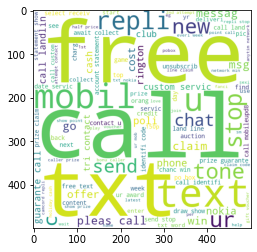

In [45]:
plt.imshow(spam_wc)

In [46]:
ham_wc  = wc.generate(df[df['Category'] == 0]['transformed_text'].str.cat(sep =""))

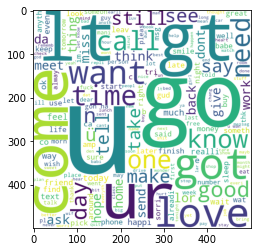

In [47]:
plt.imshow(ham_wc)

In [48]:
spam_corpus = []
for msg in df[df['Category'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9781

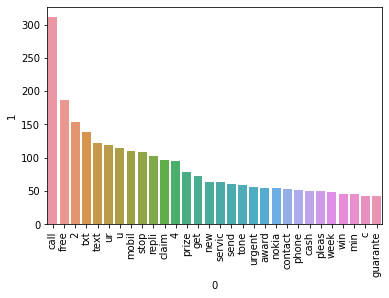

In [50]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 4. Model Building


In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [53]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

#### #Using Counvectorizer

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()


In [55]:
X = cv.fit_transform(df['transformed_text']).toarray()
X.shape



(5158, 6783)

In [56]:
y = df['Category'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [59]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8653100775193798
0.45132743362831856


In [60]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738372093023255
0.8813559322033898


In [61]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9651162790697675
0.9263157894736842


In [62]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [63]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [64]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9127906976744186, 0.6216216216216216)

In [65]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9127906976744186
Precision -  0.6216216216216216
For  KN
Accuracy -  0.9253875968992248
Precision -  1.0
For  NB
Accuracy -  0.9738372093023255
Precision -  0.8813559322033898
For  DT
Accuracy -  0.9273255813953488
Precision -  0.8
For  LR
Accuracy -  0.9738372093023255
Precision -  0.9891304347826086
For  RF
Accuracy -  0.9660852713178295
Precision -  0.9880952380952381
For  AdaBoost
Accuracy -  0.9534883720930233
Precision -  0.896551724137931
For  BgC
Accuracy -  0.9641472868217055
Precision -  0.9166666666666666
For  ETC
Accuracy -  0.9738372093023255
Precision -  1.0
For  GBDT
Accuracy -  0.9467054263565892
Precision -  0.9558823529411765
For  xgb
Accuracy -  0.9699612403100775
Precision -  0.967391304347826


In [66]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [67]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.925388,1.000000
8,ETC,0.973837,1.000000
4,LR,0.973837,0.989130
5,RF,0.966085,0.988095
10,xgb,0.969961,0.967391
9,GBDT,0.946705,0.955882
7,BgC,0.964147,0.916667
6,AdaBoost,0.953488,0.896552
2,NB,0.973837,0.881356
3,DT,0.927326,0.800000


In [68]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

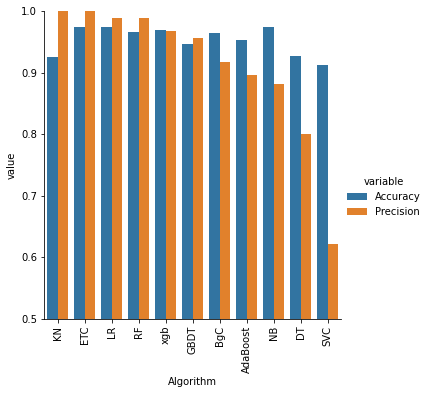

In [69]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

#### #Using TIfdfVectorizer

In [70]:

tfidf = TfidfVectorizer(max_features = 3000)
X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()
X_train ,X_test,y_train,y_test = train_test_split(X_tfidf,y,test_size=0.2)




In [71]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


train_classifier(svc,X_train,y_train,X_test,y_test)

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    #print("For ",name)
    #print("Accuracy - ",current_accuracy)
    #print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

0.8866279069767442
0.542713567839196
0.9689922480620154
0.9903846153846154
0.9767441860465116
0.9910714285714286


In [72]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [73]:
new_df = performance_df.merge(temp_df,on='Algorithm')


#### #Scaling the Vectors

In [74]:
from sklearn.preprocessing import MinMaxScaler
tfidf = TfidfVectorizer(max_features = 3500)
X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()
scaler = MinMaxScaler()
X_Tfidf = scaler.fit_transform(X_tfidf)
X_train ,X_test,y_train,y_test = train_test_split(X_tfidf,y,test_size=0.2)
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


train_classifier(svc,X_train,y_train,X_test,y_test)

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    #print("For ",name)
    #print("Accuracy - ",current_accuracy)
    #print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


0.8575581395348837
0.4358974358974359
0.9738372093023255
0.9891304347826086
0.9806201550387597
1.0


In [75]:

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [76]:
new_df = new_df.merge(temp_df,on='Algorithm')

In [77]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.925388,1.000000,0.910853,1.000000,0.925388,1.000000
1,ETC,0.973837,1.000000,0.967054,0.980769,0.976744,0.934579
2,LR,0.973837,0.989130,0.948643,0.945055,0.959302,0.921348
3,RF,0.966085,0.988095,0.969961,0.990476,0.975775,1.000000
4,xgb,0.969961,0.967391,0.964147,0.944954,0.973837,0.959184
5,GBDT,0.946705,0.955882,0.948643,0.935484,0.962209,0.987500
6,BgC,0.964147,0.916667,0.948643,0.834711,0.974806,0.933333
7,AdaBoost,0.953488,0.896552,0.960271,0.960396,0.968023,0.937500
8,NB,0.973837,0.881356,0.968992,0.990385,0.973837,0.989130
9,DT,0.927326,0.800000,0.929264,0.821053,0.943798,0.839080


#### # Voting Classifier

In [78]:
#svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
#mnb = MultinomialNB()
#etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [79]:
# Voting Classifier

from sklearn.ensemble import VotingClassifier

In [80]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)

In [81]:
voting = VotingClassifier(estimators=[('RF', rfc), ('nb', mnb), ('svc', svc)],voting='soft')

In [82]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True))],
                 voting='soft')

In [83]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796511627906976
Precision 0.9897959183673469


In [84]:

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_voting':accuracy_scores,'Precision_voting':precision_scores}).sort_values('Precision_voting',ascending=False)

new_df = new_df.merge(temp_df,on='Algorithm')

#### # Stacking Classifier

In [85]:
# Applying stacking
estimators=[ ('svc', svc),('nb', mnb), ('etc', etc)]
final_estimator=RandomForestClassifier()

In [86]:
from sklearn.ensemble import StackingClassifier

In [87]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [88]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))


Accuracy 0.9864341085271318


In [89]:
print("Precision",precision_score(y_test,y_pred))

Precision 0.9724770642201835


In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_stacking':accuracy_scores,'Precision_stacking':precision_scores}).sort_values('Precision_stacking',ascending=False)

new_df = new_df.merge(temp_df,on='Algorithm')

In [91]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_voting,Precision_voting,Accuracy_stacking,Precision_stacking
0,KN,0.925388,1.000000,0.910853,1.000000,0.925388,1.000000,0.925388,1.000000,0.925388,1.000000
1,ETC,0.973837,1.000000,0.967054,0.980769,0.976744,0.934579,0.976744,0.934579,0.976744,0.934579
2,LR,0.973837,0.989130,0.948643,0.945055,0.959302,0.921348,0.959302,0.921348,0.959302,0.921348
3,RF,0.966085,0.988095,0.969961,0.990476,0.975775,1.000000,0.975775,1.000000,0.975775,1.000000
4,xgb,0.969961,0.967391,0.964147,0.944954,0.973837,0.959184,0.973837,0.959184,0.973837,0.959184
5,GBDT,0.946705,0.955882,0.948643,0.935484,0.962209,0.987500,0.962209,0.987500,0.962209,0.987500
6,BgC,0.964147,0.916667,0.948643,0.834711,0.974806,0.933333,0.974806,0.933333,0.974806,0.933333
7,AdaBoost,0.953488,0.896552,0.960271,0.960396,0.968023,0.937500,0.968023,0.937500,0.968023,0.937500
8,NB,0.973837,0.881356,0.968992,0.990385,0.973837,0.989130,0.973837,0.989130,0.973837,0.989130
9,DT,0.927326,0.800000,0.929264,0.821053,0.943798,0.839080,0.943798,0.839080,0.943798,0.839080


In [94]:
fitted_model=mnb.fit(X_train,y_train)

In [95]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(fitted_model,open('model.pkl','wb'))